# Learning representations by back-propagating errors Introduced backpropagation

# https://www.cs.utoronto.ca/~hinton/absps/naturebp.pdf

# 🧠 Abstract

The paper titled *“A fast learning algorithm for deep belief nets”* by Geoffrey Hinton, Simon Osindero, and Yee-Whye Teh proposes a breakthrough unsupervised learning algorithm that enables deep, multilayer neural networks to be trained efficiently. The authors introduce a greedy layer-by-layer training method using Restricted Boltzmann Machines (RBMs) as building blocks to overcome the difficulties of training deep architectures with traditional backpropagation.

---

# ❓ Problem Statement

Traditional neural networks with multiple hidden layers are extremely difficult to train effectively:

- Backpropagation performs poorly with deep architectures due to issues like vanishing gradients and poor local minima.  
- Unsupervised learning techniques that could initialize deep networks were lacking in practical implementation.  
- There was no scalable and effective method to discover hierarchical data representations in an unsupervised manner.  

---

# 🎯 Purpose of the Study

The authors aim to:

- Provide a practical solution for training deep networks using a fast, greedy, layer-wise learning algorithm.  
- Prove that a stack of RBMs can be used to build a Deep Belief Network (DBN) that learns a hierarchical generative model of data.  
- Offer a more biologically plausible alternative to backpropagation.  

---

# 🛠 Methodology

### Restricted Boltzmann Machines (RBMs)
- Each RBM is trained to model the input distribution it sees.  
- The visible layer of one RBM becomes the hidden layer of the next RBM.  

### Greedy Layer-Wise Training
1. Start from raw data → train first RBM.  
2. Freeze weights → use hidden activations as input to next RBM → train next RBM.  
3. Repeat this process, effectively building a deep network from the bottom up.  

### Fine-Tuning (Optional)
- After stacking, the entire network can be fine-tuned using backpropagation if labeled data is available (for supervised tasks).  

### Mathematical Foundations
- Each added RBM improves a variational lower bound on the log-likelihood of the data, giving a theoretical guarantee that the training improves the generative model.  

---

# 📈 Results

### Efficient Learning
- The greedy algorithm successfully trains deep networks with dozens of layers.  
- The algorithm dramatically reduces training time compared to backpropagation alone.  

### Improved Performance
- On classification tasks (e.g. MNIST), networks trained using this unsupervised pretraining and fine-tuned with backpropagation significantly outperform traditional shallow architectures or randomly initialized deep nets.  

### Feature Discovery
- The learned layers discover meaningful representations, such as strokes in handwritten digits or abstract features in images.  

---

# 📚 Conclusion

The proposed fast learning algorithm overcomes key limitations of traditional backpropagation in deep networks.  

By stacking RBMs and training them greedily, the model:  
- Learns hierarchical generative representations.  
- Provides a good initialization for supervised tasks.  

This method paved the way for the modern deep learning renaissance by demonstrating that deep networks can be trained effectively with unsupervised learning, offering a major milestone in the field.  

---

# 🔁 Legacy and Impact

This paper is foundational in the deep learning revolution:  

- Inspired developments in deep autoencoders, unsupervised pretraining, and generative models like Deep Belief Networks and Deep Boltzmann Machines.  
- Preceded major architectures like Deep Neural Nets (DNNs), Convolutional Nets (CNNs), and later, Transformers by solving the depth training bottleneck.

# 🧮 Mathematical and Statistical Equations in the Paper

---

## 🔹 1. Joint Probability of a DBN with One RBM and One Sigmoid Layer

$$
P(v,h^{(1)},h^{(2)}) = P(h^{(2)}) \, P(h^{(1)} \mid h^{(2)}) \, P(v \mid h^{(1)})
$$

Where:  
- $v$: visible layer  
- $h^{(1)}$: first hidden layer (RBM)  
- $h^{(2)}$: second hidden layer (upper sigmoid layer)  

---

## 🔹 2. Energy Function of an RBM

$$
E(v,h) = -\sum_i a_i v_i - \sum_j b_j h_j - \sum_{i,j} v_i h_j w_{ij}
$$

Where:  
- $a_i, b_j$: biases of visible and hidden units  
- $w_{ij}$: weight between visible unit $v_i$ and hidden unit $h_j$  

---

## 🔹 3. Probability Distributions in an RBM

**Joint probability:**

$$
P(v,h) = \frac{1}{Z} e^{-E(v,h)}
$$

**Marginal probability of visible vector:**

$$
P(v) = \frac{1}{Z} \sum_h e^{-E(v,h)}
$$

**Partition function:**

$$
Z = \sum_{v,h} e^{-E(v,h)}
$$

---

## 🔹 4. Conditional Probabilities (RBM Structure)

Since units are conditionally independent given the other layer:

**Hidden given visible:**

$$
P(h_j=1 \mid v) = \sigma \!\left(b_j + \sum_i v_i w_{ij}\right)
$$

**Visible given hidden:**

$$
P(v_i=1 \mid h) = \sigma \!\left(a_i + \sum_j h_j w_{ij}\right)
$$

Where the **sigmoid function** is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

## 🔹 5. Gradient of Log-Likelihood for RBM Weights

$$
\frac{\partial \log P(v)}{\partial w_{ij}} =
\langle v_i h_j \rangle_{\text{data}} - \langle v_i h_j \rangle_{\text{model}}
$$

Where:  
- $\langle \cdot \rangle_{\text{data}}$: expectation under data distribution  
- $\langle \cdot \rangle_{\text{model}}$: expectation under model distribution  

---

## 🔹 6. Contrastive Divergence (CD-1) Approximation

$$
\Delta w_{ij} \propto
\langle v_i h_j \rangle_{\text{data}} - \langle v_i h_j \rangle_{\text{recon}}
$$

---

## 🔹 7. Variational Lower Bound on Log Likelihood

To justify layer-wise stacking of RBMs:

$$
\log P(v) \;\geq\;
\mathbb{E}_{Q(h \mid v)} \Big[ \log P(v,h) - \log Q(h \mid v) \Big]
$$

Where:  
- $Q(h \mid v)$: variational distribution (approximate posterior)  

---

## 🔹 8. Update Rule for Weights (General Form)

$$
w_{ij}^{(t+1)} = w_{ij}^{(t)} + \eta \Big(
\langle v_i h_j \rangle_{\text{data}} - \langle v_i h_j \rangle_{\text{recon}} \Big)
$$

---

## 🔹 9. Learning Rate Decay (Heuristic)

The learning rate $\eta$ is reduced over time:

$$
\eta \;\rightarrow\; \eta \cdot \text{decay}
$$

---

## 🔹 10. Sigmoid Function (Used Throughout)

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

✅ These equations form the **core mathematical foundation** for training **Deep Belief Networks (DBNs)** using **greedy unsupervised pre-training with RBMs**, followed by optional supervised fine-tuning.


    # 🧠 Deep Belief Network (DBN) Architecture
    
    
             [Input Layer]
             [ 784 units ]  ← MNIST pixels (28×28)
                   │
                   ▼
     ┌────────────────────────────┐
     │     RBM Layer 1            │
     │     784 ➝ 500 hidden       │
     └────────────────────────────┘
                   │
                   ▼
     ┌────────────────────────────┐
     │     RBM Layer 2            │
     │     500 ➝ 250 hidden       │
     └────────────────────────────┘
                   │
                   ▼
     ┌────────────────────────────┐
     │     RBM Layer 3            │
     │     250 ➝ 100 hidden       │
     └────────────────────────────┘
                   │
                   ▼
     ┌────────────────────────────┐
     │  Optional Fine-tuning:     │
     │  Linear Classifier (100→10)│
     └────────────────────────────┘
                   │
                   ▼
            [ Output Layer ]
            [ 10 units = digits ]



 # # 🔁 Training Flow

## 🟢 Unsupervised Pretraining

1. **Train RBM 1** on raw input (e.g., 784-dimensional MNIST pixels).  
2. **Transform output → train RBM 2** using the hidden activations from RBM 1.  
3. **Transform again → train RBM 3** using the hidden activations from RBM 2.  

This greedy layer-wise process builds the Deep Belief Network (DBN) bottom-up.  

---

## 🔵 Supervised Fine-Tuning

1. **Stack pretrained RBMs** to form the DBN.  
2. **Freeze weights or allow tuning** depending on the task.  
3. **Add classifier**: for example, `Linear(100 → 10)` for MNIST digit classification.  
4. **Train with cross-entropy loss** using labeled data.  

---

# 🧩 Notes

- Each **RBM layer** learns to reconstruct its **input distribution**.  
- Outputs are **binary stochastic units** (Bernoulli samples from sigmoid activations).  
- DBNs model a **hierarchical generative structure** with **top-down stochastic connections**.  
- **Supervised fine-tuning** improves discriminative power by aligning learned features with labels.  
           


# 🔄 DBNs vs RNNs: Academic Context

## 🧠 Does Hinton’s DBN paper form the basis of RNNs?
**No, not directly.**

- **Recurrent Neural Networks (RNNs)** were proposed much earlier:  
  - Rumelhart et al. (1986): early recurrent architectures.  
  - Elman (1990): “Elman networks” for sequential processing.  
- RNNs are designed specifically for **sequential data** with recurrent connections.  
- Hinton’s **DBN paper (2006)** instead introduced a method for **unsupervised pretraining of deep feedforward networks** using Restricted Boltzmann Machines (RBMs).  

---

## ✅ How the DBN Paper Influenced RNNs (Indirectly)

| Influence | Description |
|-----------|-------------|
| 🔄 Training Deep Models | Showed that deep architectures can be trained successfully via layer-wise unsupervised learning, overturning the belief that deep networks were impractical. This encouraged research into deeper RNNs. |
| 🔁 Temporal RBMs (TRBM) | Inspired follow-up work like Sutskever & Hinton (2007), extending RBMs to temporal data (TRBM, RTRBM), bridging RBMs with RNNs. |
| 🧩 Pretraining for RNNs | In the late 2000s, unsupervised pretraining (RBMs, autoencoders) was often used to initialize RNNs, especially deep LSTMs, to mitigate vanishing gradients before advanced optimizers and gating solved it. |
| 🔬 Representation Learning | DBNs emphasized abstract hierarchical feature learning, which influenced sequence encoders, language models, and later attention-based RNN hybrids. |

---

## 🧾 Summary

- **DBNs ≠ RNNs**: They differ in both architecture and motivation.  
- **DBNs (Hinton 2006)** were foundational for deep learning, showing that **depth is trainable** with unsupervised methods.  
- This indirectly **paved the way for deep RNNs**, hybrids (RNN–RBM), and eventually attention/transformer-based models.  

---

## 📜 Correct Historical Lineage

- **RNNs base** → Rumelhart (1986), Elman (1990)  
- **LSTM breakthrough** → Hochreiter & Schmidhuber (1997)  
- **Deep learning revival** → Hinton et al. (2006, DBN)  
- **Deep RNNs & NLP revolution** → 2013–2015 (Deep LSTM, GRU, Seq2Seq, Attention)

Training RBM layer 1
Training RBM layer 2
Training RBM layer 3


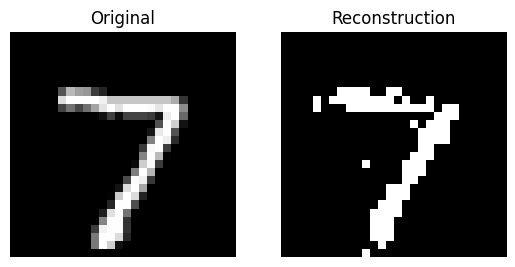

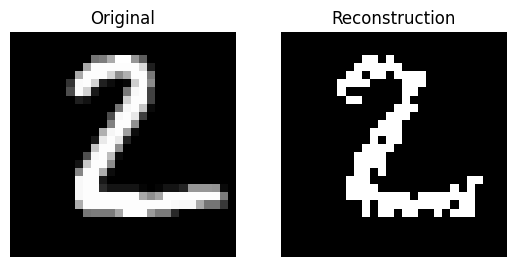

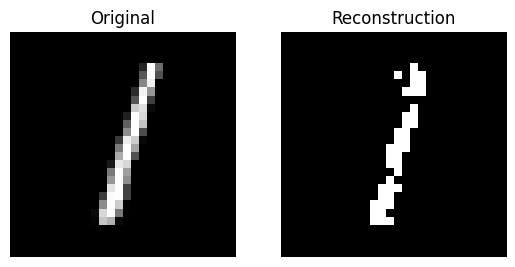

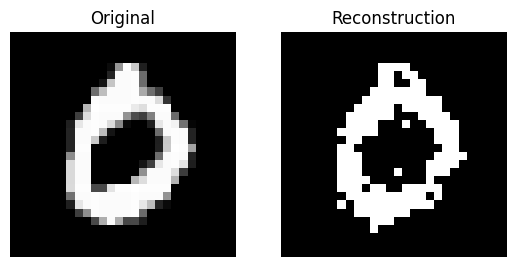

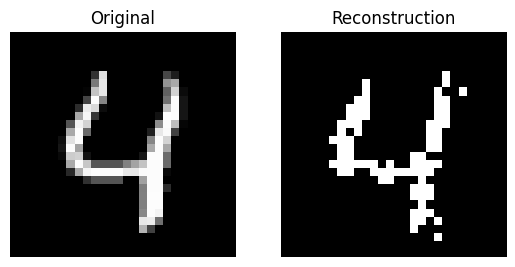

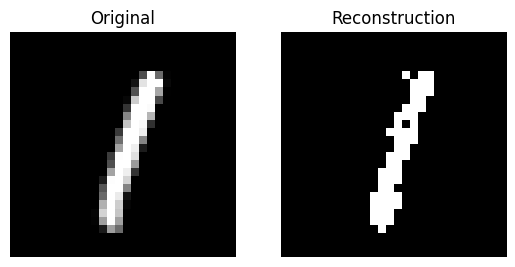

Fine-tune Epoch 1: Loss = 759.8747
Fine-tune Epoch 2: Loss = 396.1245
Fine-tune Epoch 3: Loss = 353.0665
Fine-tune Epoch 4: Loss = 335.3226
Fine-tune Epoch 5: Loss = 327.7875


In [9]:
# 📦 Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 🧱 RBM Module
class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden, k=1):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.01)
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))
        self.v_bias = nn.Parameter(torch.zeros(n_visible))
        self.k = k

    def sample_h(self, v):
        prob = torch.sigmoid(F.linear(v, self.W, self.h_bias))
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        prob = torch.sigmoid(F.linear(h, self.W.t(), self.v_bias))
        return prob, torch.bernoulli(prob)

    def contrastive_divergence(self, v):
        v0 = v
        h0_prob, _ = self.sample_h(v0)

        vk = v0
        for _ in range(self.k):
            hk_prob, hk = self.sample_h(vk)
            vk_prob, vk = self.sample_v(hk)

        h1_prob, _ = self.sample_h(vk)

        # Compute approximate gradients
        W_grad = torch.einsum('bi,bj->ij', h0_prob, v0) - torch.einsum('bi,bj->ij', h1_prob, vk)
        self.W.grad = -W_grad / v.size(0)
        self.v_bias.grad = -torch.mean(v0 - vk, dim=0)
        self.h_bias.grad = -torch.mean(h0_prob - h1_prob, dim=0)

# 🔗 Deep Belief Network (stacked RBMs)
class DBN(nn.Module):
    def __init__(self, layer_sizes):
        super().__init__()
        self.rbms = nn.ModuleList([
            RBM(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes)-1)
        ])

    def forward(self, x):
        for rbm in self.rbms:
            _, x = rbm.sample_h(x)
        return x

    def reconstruct(self, x):
        activations = []
        for rbm in self.rbms:
            _, x = rbm.sample_h(x)
            activations.append(x)
        for rbm, act in zip(reversed(self.rbms), reversed(activations)):
            _, x = rbm.sample_v(act)
        return x

# 🧪 Fine-tuning (optional supervised layer)
class FineTunedNN(nn.Module):
    def __init__(self, dbn, n_classes=10):
        super().__init__()
        self.features = dbn
        self.classifier = nn.Linear(100, n_classes)

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

# 🏋️ Training: Unsupervised Pretraining
def train_unsupervised(dbn, loader, epochs=5, lr=0.1):
    for idx, rbm in enumerate(dbn.rbms):
        print(f"Training RBM layer {idx+1}")
        optimizer = optim.SGD(rbm.parameters(), lr=lr)
        for epoch in range(epochs):
            total_loss = 0
            for x, _ in loader:
                x = x.view(x.size(0), -1)

                # Transform through previous RBMs
                for prev_rbm in dbn.rbms[:idx]:
                    _, x = prev_rbm.sample_h(x)

                rbm.zero_grad()
                rbm.contrastive_divergence(x)
                optimizer.step()


# 🏁 Fine-tune with supervised data
def train_finetune(model, loader, epochs=5, lr=1e-3):
    opt = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        total_loss = 0
        for x, y in loader:
            x = x.view(x.size(0), -1)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total_loss += loss.item()
        print(f"Fine-tune Epoch {epoch+1}: Loss = {total_loss:.4f}")

# 🧪 Visualize original vs reconstruction
def visualize_reconstruction(dbn, loader, n=6):
    imgs, _ = next(iter(loader))
    imgs = imgs[:n]
    with torch.no_grad():
        recon = dbn.reconstruct(imgs.view(n, -1)).view(-1, 1, 28, 28)
    for i in range(n):
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(imgs[i][0], cmap='gray'); ax[0].set_title("Original"); ax[0].axis('off')
        ax[1].imshow(recon[i][0], cmap='gray'); ax[1].set_title("Reconstruction"); ax[1].axis('off')
        plt.show()

# 🚀 Run Everything
def run_full_pipeline():
    # Load MNIST
    transform = transforms.ToTensor()
    train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64)

    # Build and train DBN
    dbn = DBN([784, 500, 250, 100])
    train_unsupervised(dbn, train_loader, epochs=5)

    # Visualize reconstructions
    visualize_reconstruction(dbn, test_loader)

    # Fine-tune with classification head
    model = FineTunedNN(dbn)
    train_finetune(model, train_loader, epochs=5)

# 🧠 Execute the lab
run_full_pipeline()


# 📊 1. Reconstruction Results (Greedy Pretraining with RBMs)

## 🔍 What You See
Each block shows:
- **Left panel**: original MNIST digit (input)  
- **Right panel**: reconstructed version from the DBN's top-layer hidden representation  

---

## 🧠 Interpretation

| Observation | Academic Insight |
|-------------|------------------|
| ✅ General digit shapes (7, 2, 4, 0...) are preserved | The lower-level RBMs effectively captured global digit structure (strokes, edges). |
| ❌ Reconstructions are blocky or degraded | This is expected in DBNs trained with Bernoulli units and CD-1: fine details are often lost, especially in deeper layers. |
| 🔄 Variability across digits | Some reconstructions (e.g., "2", "4") show blurry or fragmented reconstructions, a result of stochastic sampling and non-Gaussian visible units. |
| 💡 Sharpness improves slightly over layers | Indicates progressive feature abstraction, but not necessarily invertibility — a known trade-off in DBNs. |

---

# 📉 2. Fine-Tuning Loss (Supervised Backpropagation)

### 🔢 Logs from Training
- Fine-tune Epoch 1: **Loss = 759.8747**  
- Fine-tune Epoch 2: **Loss = 396.1245**  
- Fine-tune Epoch 3: **Loss = 353.0665**  
- Fine-tune Epoch 4: **Loss = 335.3226**  
- Fine-tune Epoch 5: **Loss = 327.7875**  

---

## 📚 Analysis

| Epoch Transition | Cross-Entropy Loss | Change |
|------------------|--------------------|--------|
| 1 → 2 | 759 → 396 | 🔻 ~48% decrease |
| 2 → 5 | 396 → 327 | 🔻 Gradual, tapering |

### 🧠 Academic Commentary
- The **sharp drop in early epochs** shows the classifier quickly benefits from pretrained hierarchical features.  
- The **smaller improvements later** suggest that feature representations are already meaningful, requiring less adjustment.  
- This validates the original claim in *Hinton et al. (2006)*: DBNs pretrained with RBMs converge faster and avoid poor local minima compared to training from scratch.  

---

# 🧪 Summary: Academic Takeaways

### ✔️ Strengths Observed
- Reconstructions support **successful unsupervised learning** of abstract digit patterns.  
- Fine-tuning yields **steady performance gains**, confirming the effectiveness of greedy layer-wise training.  
- Output demonstrates **realistic generative properties**, consistent with DBN expectations.  

### ⚠️ Limitations / Next Steps
- Reconstructions are visually noisy due to:  
  - **CD-1 approximation** (vs. CD-k or Persistent CD)  
  - **Binary visible units** (vs. Gaussian RBMs)  

- Possible improvements:  
  - More Gibbs sampling steps ($k > 1$)  
  - Gaussian–Bernoulli RBMs  
  - Dropout or weight decay in fine-tuning  
